In [1]:
import rasterio

In [2]:
import numpy as np

In [3]:
tif_file = rasterio.open('./resources/GHS_POP_E2015_GLOBE.tif')
ghs_data = tif_file.read()

In [4]:
print ("Tiff Boundary", tif_file.bounds)
print("Tiff CRS", tif_file.crs)
print("Data Shape", ghs_data.shape)
print("Max value", np.amax(ghs_data))
print("Min value", np.amin(ghs_data))

Tiff Boundary BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
Tiff CRS EPSG:4326
Data Shape (1, 21600, 43200)
Max value 459434.619140625
Min value -200.0


In [5]:
ghs_data[0][ghs_data[0] < 0.0] = 0.0

In [6]:
from matplotlib import cm
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap,ListedColormap

In [7]:
ourcmap = cm.get_cmap('hot_r', 460)
newcolors = ourcmap(np.linspace(0, 1, 460))
background_color = np.array([0.9882352841176461, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_color
newcmp = ListedColormap(newcolors)

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

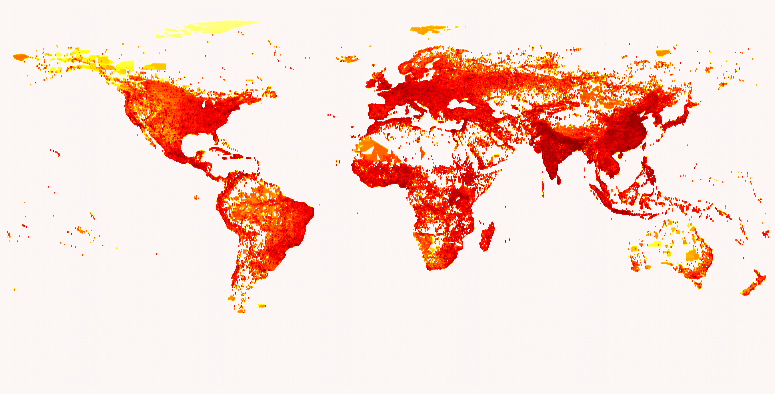

In [9]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=colors.LogNorm(), cmap=newcmp)
ax.axis('off')
plt.show()

In [37]:
our_cmap = cm.get_cmap('hot_r', 10)
newcolors = our_cmap(np.linspace(0, 1, 10))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors = np.vstack((background_colour, newcolors))
our_cmap = ListedColormap(newcolors)
bounds = [0.0, 1, 5, 10, 20, 50, 100, 200, 1000, 2000, 10000]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

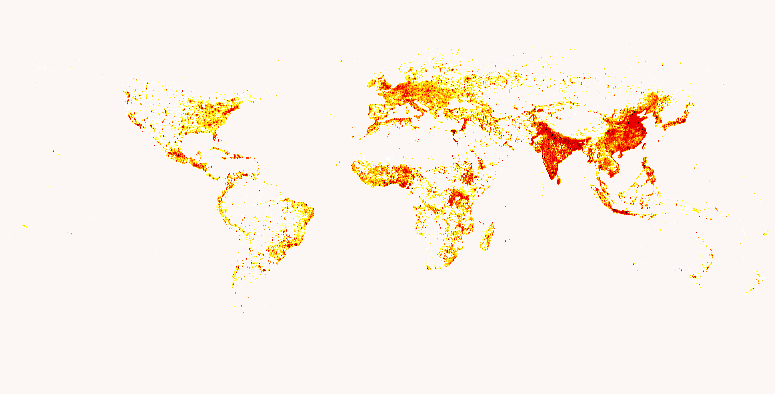

In [11]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=norm, cmap=our_cmap)
ax.axis('off')
plt.show()

In [12]:
import pandas as pd

In [13]:
import geopandas as gpd

In [14]:
df = gpd.read_file('./resources/10m_cultural/ne_10m_admin_0_countries.shp')
western_europe = df.loc[df['ADMIN'].isin(['United Kingdom', 'Germany', 'Austria', 'Czechia',
                                              'Italy', 'Denmark', 'Luxembourg',
                                              'Belgium', 'Switzerland', 'Ireland'])]
france = df.loc[df['ADMIN'] == 'France']
Polygons = list(france.iloc[0].geometry)
france.geometry = [Polygons[1]]

spain = df.loc[df['ADMIN'] == 'Spain']
Polygons = list(spain.iloc[0].geometry)
spain.geometry = [Polygons[2]]

netherlands = df.loc[df['ADMIN'] == 'Netherlands']
Polygons = list(netherlands.iloc[0].geometry)
netherlands.geometry = [Polygons[0]]


portugal = df.loc[df['ADMIN'] == 'Portugal']
Polygons = list(portugal.iloc[0].geometry)
portugal.geometry = [Polygons[0]]

western_europe = pd.concat([western_europe, france, spain, netherlands, portugal])

/var/folders/9g/j8lkrc8n6sbc06195cyfsb3m0000gn/T/ipykernel_16716/377606378.py:6: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  Polygons = list(france.iloc[0].geometry)
/var/folders/9g/j8lkrc8n6sbc06195cyfsb3m0000gn/T/ipykernel_16716/377606378.py:6: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  Polygons = list(france.iloc[0].geometry)
/Users/yvesm/opt/anaconda3/envs/myenvi/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [15]:
from shapely.geometry import mapping
from rasterio import mask as msk

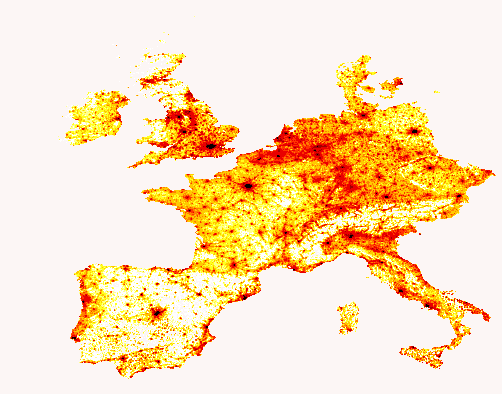

In [16]:
europe_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in western_europe.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(europe_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
plt.show()

In [17]:
php = df[df['ADMIN'] == 'Philippines']

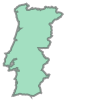

In [18]:
Polygons[0]

In [19]:
portugal[['geometry']]

,geometry
140,"POLYGON ((-7.10486 38.82719, -7.15101 38.81929..."


In [20]:
php[['geometry']]

,geometry
182,"MULTIPOLYGON (((120.86069 5.57437, 120.87306 5..."


### Mini challenge: create a pop density map for PHL

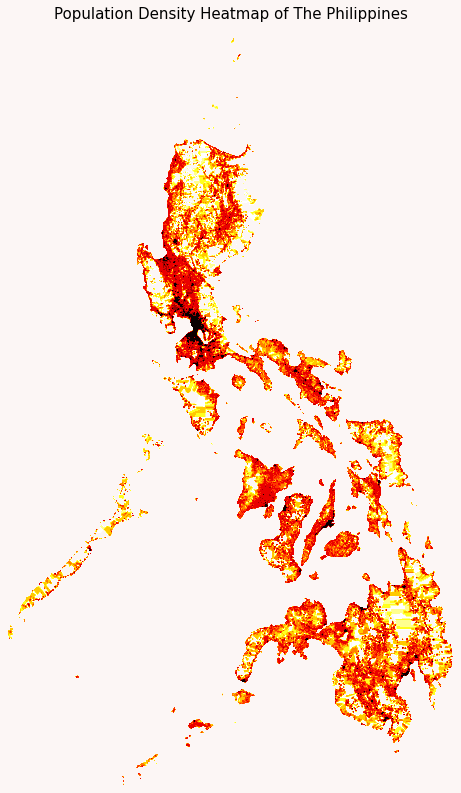

In [77]:
php_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in php.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(21, 14)

ax.imshow(php_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
ax.set_title('Population Density Heatmap of The Philippines', {'fontsize':15})

#map the data to clors
#imaj is now in RGBA (512x512x4)
imaj = our_cmap(norm(php_array[0]))

plt.show()
#plt.imsave('./resources/php_popdensity.png', imaj, dpi=2000)

In [82]:
php_array[0]

array([[-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.],
       ...,
       [-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.],
       [-200., -200., -200., ..., -200., -200., -200.]])

In [81]:
php_array[0].shape

(1977, 1161)